In [1]:
! pip install jcopml


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
df = pd.read_csv('gamma_interp.csv')
df.describe()

,LOGFZI,FZI,CGR,DRHO,DT5,GR,HNPO,LLD,LLHR,LLS,MRES,MSFC,NPHI,NPOR,POTA,RHOB,SP,THOR,URAN
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2.312846,456.224651,45.024872,0.026687,80.306421,55.623111,0.154084,2.199655,2.912141,2.081772,0.067091,2.450155,0.151012,0.153865,1.548277,2.424941,2.174896,4.829705,1.663656
std,0.713041,400.791802,24.695799,0.013808,3.967383,26.471878,0.038952,1.688266,2.730197,1.666483,0.000481,2.721835,0.039620,0.038409,0.795357,0.081100,1.507371,3.154398,1.194522
min,0.653550,4.503497,14.161406,0.000285,73.306692,27.676605,0.086823,1.075735,1.151446,0.878654,0.066300,0.870016,0.084174,0.086485,0.186907,2.183371,-1.564138,1.749333,0.122274
25%,1.732563,54.033758,27.581358,0.018462,77.275580,36.614972,0.128285,1.250791,1.525993,1.052103,0.066700,1.082979,0.123208,0.127655,0.970231,2.367539,1.307288,2.606146,0.766279
50%,2.561085,364.007985,35.421470,0.024900,80.108254,47.948590,0.149612,1.488671,1.700839,1.323578,0.067100,1.309856,0.150578,0.149676,1.352433,2.409563,1.722031,3.111152,1.373968
75%,2.892230,780.286831,60.317010,0.033231,82.086147,68.430302,0.173536,2.611559,3.128704,2.460139,0.067500,2.451143,0.171290,0.171760,2.012678,2.461645,3.769162,6.570513,2.161793
max,3.186434,1536.150361,123.352332,0.094249,95.135066,138.581176,0.336309,10.035103,17.122944,9.043026,0.067983,16.751086,0.348742,0.340156,3.859390,2.669242,4.921527,15.291887,5.315701


array([[<AxesSubplot:title={'center':'LOGFZI'}>,
        <AxesSubplot:title={'center':'FZI'}>,
        <AxesSubplot:title={'center':'CGR'}>,
        <AxesSubplot:title={'center':'DRHO'}>],
       [<AxesSubplot:title={'center':'DT5'}>,
        <AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'HNPO'}>,
        <AxesSubplot:title={'center':'LLD'}>],
       [<AxesSubplot:title={'center':'LLHR'}>,
        <AxesSubplot:title={'center':'LLS'}>,
        <AxesSubplot:title={'center':'MRES'}>,
        <AxesSubplot:title={'center':'MSFC'}>],
       [<AxesSubplot:title={'center':'NPHI'}>,
        <AxesSubplot:title={'center':'NPOR'}>,
        <AxesSubplot:title={'center':'POTA'}>,
        <AxesSubplot:title={'center':'RHOB'}>],
       [<AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'THOR'}>,
        <AxesSubplot:title={'center':'URAN'}>, <AxesSubplot:>]],
      dtype=object)

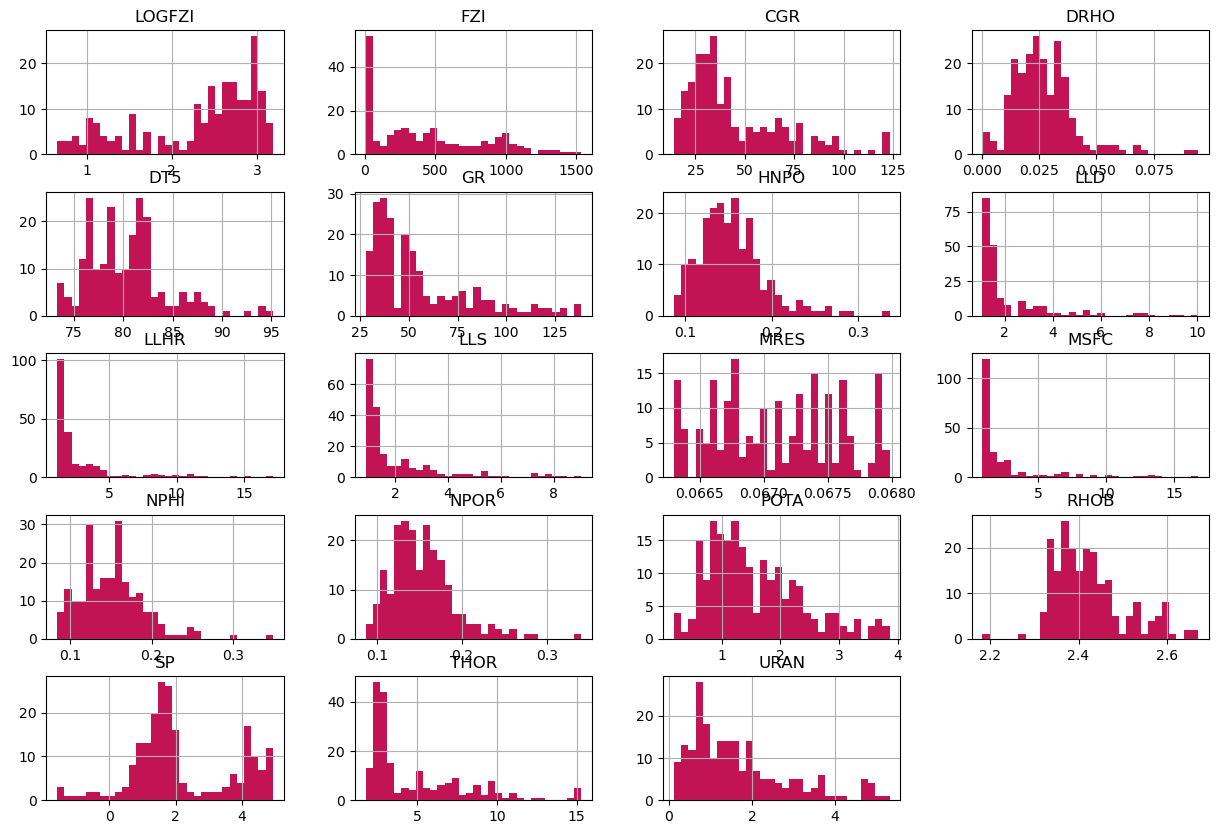

In [3]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), color='#c21454')


<AxesSubplot:>

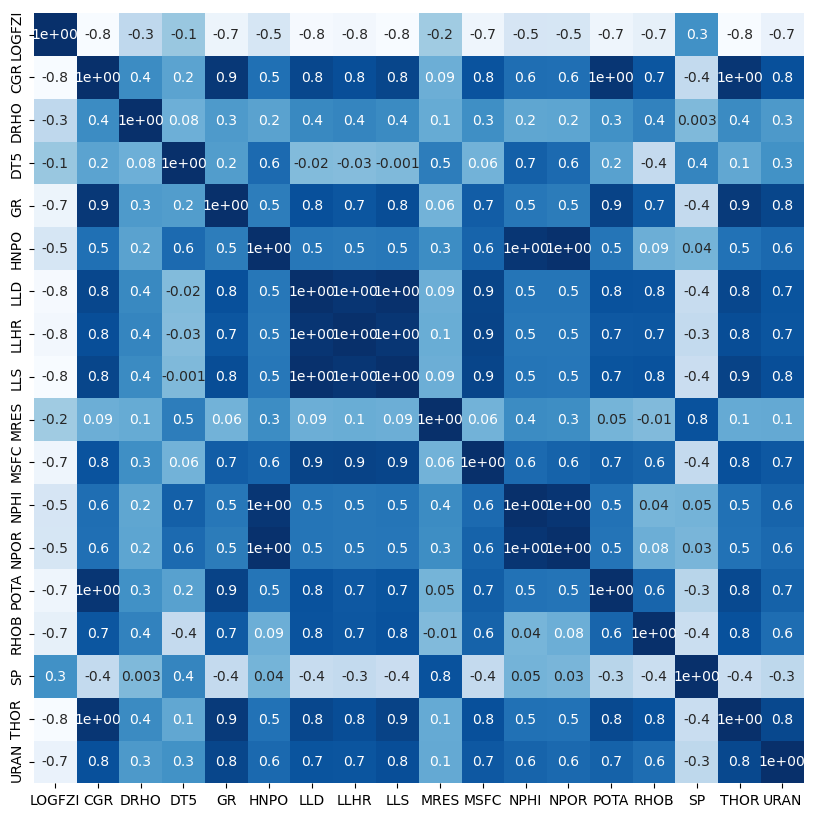

In [4]:
df = df.drop(columns = ['FZI'])
#X = data[['CGR', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD', 'LLHR', 'LLS', 'MRES', 'MSFC', 'NPHI', 'NPOR', 'RHOB', 'SP', 'THOR', 'URAN', 'POTA']]
#df = df[['LOGFZI', 'CGR', 'GR','LLD', 'LLS','LLHR', 'MRES', 'MSFC', 'NPOR']]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "Blues", cbar= False, annot= True, square= True, fmt= '.1')

In [5]:
X = df.drop(columns="LOGFZI")
y = df.LOGFZI

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 17), (53, 17), (159,), (53,))

In [6]:
X_train.columns

Index(['CGR', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD', 'LLHR', 'LLS', 'MRES',
       'MSFC', 'NPHI', 'NPOR', 'POTA', 'RHOB', 'SP', 'THOR', 'URAN'],
      dtype='object')

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X = df.drop(columns="LOGFZI")
y = df.LOGFZI

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust', transform='yeo-johnson', poly=2), X.columns)
])

from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 70, 'algo__max_features': 0.12828626711806085, 'algo__min_samples_leaf': 7, 'algo__n_estimators': 151}
0.91248899506429 0.8199064927097615 0.899809313027205


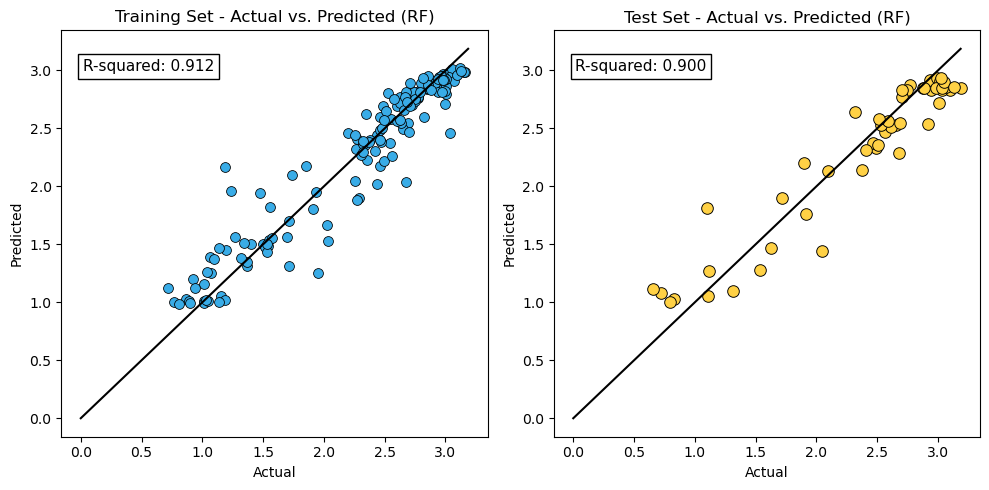

In [9]:
# Predict on training and test sets
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (RF)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (RF)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

In [10]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard', transform = 'yeo-johnson'), X.columns )])


from xgboost import XGBRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model_XGB = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_XGB.fit(X_train, y_train)

print(model_XGB.best_params_)
print(model_XGB.score(X_train, y_train), model_XGB.best_score_, model_XGB.score(X_test, y_test))

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.8942466798200436 0.8030218181741197 0.872223797885253


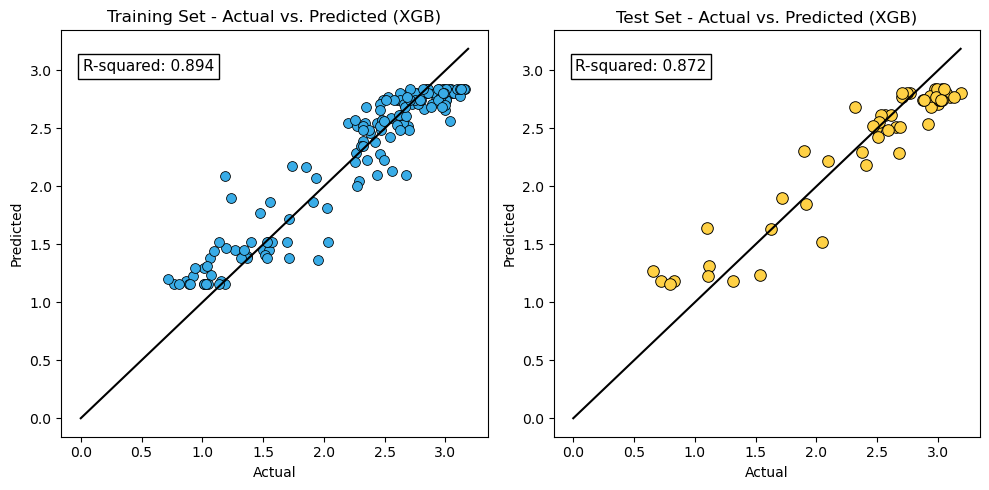

In [11]:
# Predict on training and test sets
y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (XGB)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (XGB)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 12.746711578215054, 'algo__gamma': 0.4374364439939081}
0.9239807233793693 0.8441520720665192 0.8824080735157916


C:\Users\haabub\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


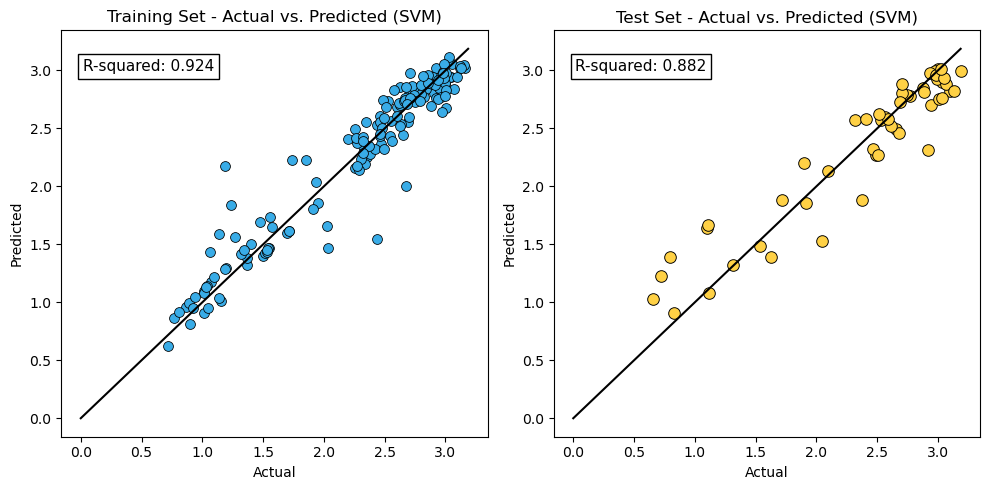

In [12]:
from sklearn.svm import SVR
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), X.columns )])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model_SVM = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.best_score_, model_SVM.score(X_test, y_test))

# Predict on training and test sets
y_train_pred = model_SVM.predict(X_train)
y_test_pred = model_SVM.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (SVM)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (SVM)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (16, 8, 4), 'mlp__alpha': 0.003, 'mlp__activation': 'identity'}
0.8259776714918362 0.7859022906859169 0.8951271365254266


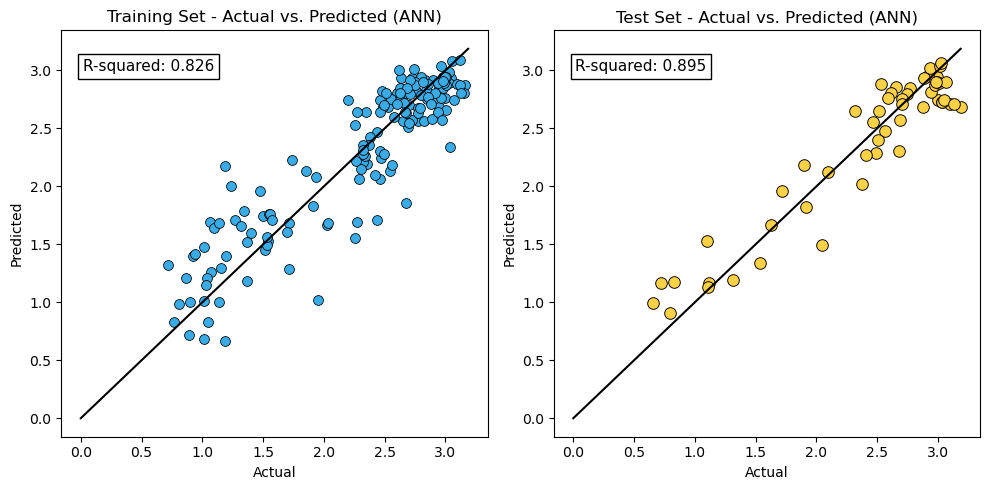

In [13]:
from sklearn.neural_network import MLPRegressor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard', poly = 2, transform= 'yeo-johnson'), X.columns )])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPRegressor(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
    "mlp__hidden_layer_sizes": [(16, 8, 4), (16, 4), (8, 4), (13, 8, 2), (32, 16, 2), (64, 32, 16, 8, 4, 2)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["identity"]
}

model_ANN = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_ANN.fit(X_train, y_train)

print(model_ANN.best_params_)
print(model_ANN.score(X_train, y_train), model_ANN.best_score_, model_ANN.score(X_test, y_test))

# Predict on training and test sets
y_train_pred = model_ANN.predict(X_train)
y_test_pred = model_ANN.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (ANN)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (ANN)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

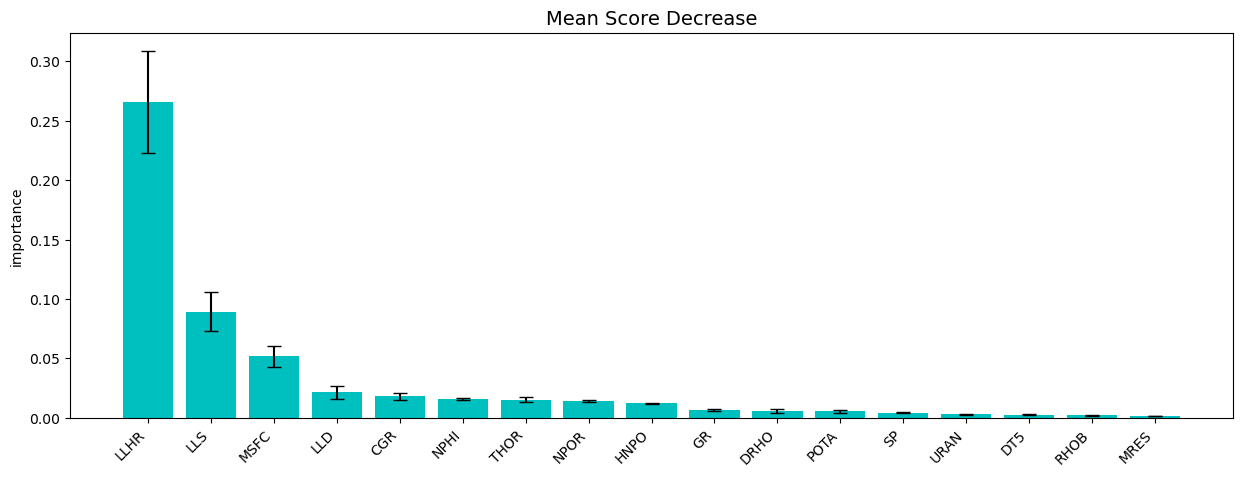

In [18]:
from jcopml.plot import plot_residual

df_imp = mean_score_decrease(X_train, y_train, model_RF, plot=True, topk = 18)

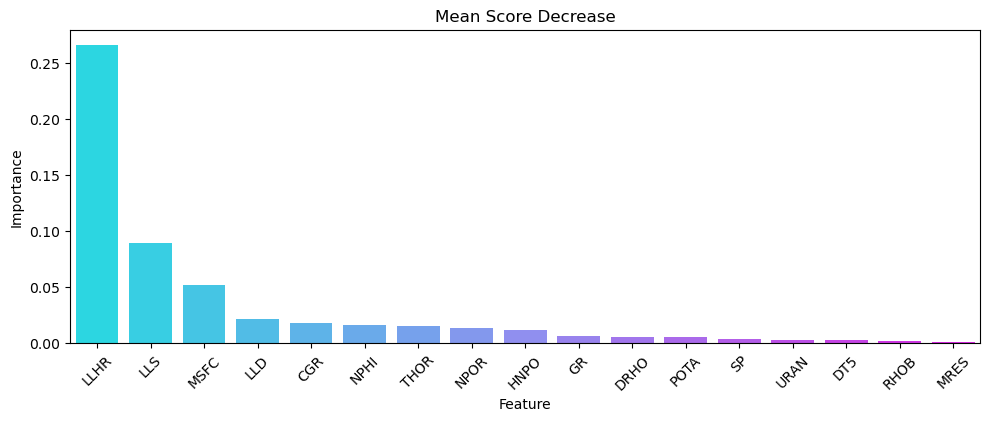

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_residual(df_imp):
    plt.figure(figsize=(10, 4.325))
    sns.barplot(x='feature', y='importance', data=df_imp, palette='cool')
    plt.xticks(rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Mean Score Decrease')
    plt.tight_layout()
    plt.show()

df_imp = mean_score_decrease(X_train, y_train, model_RF, plot=False, topk=18)
plot_residual(df_imp.head(18))

<AxesSubplot:>

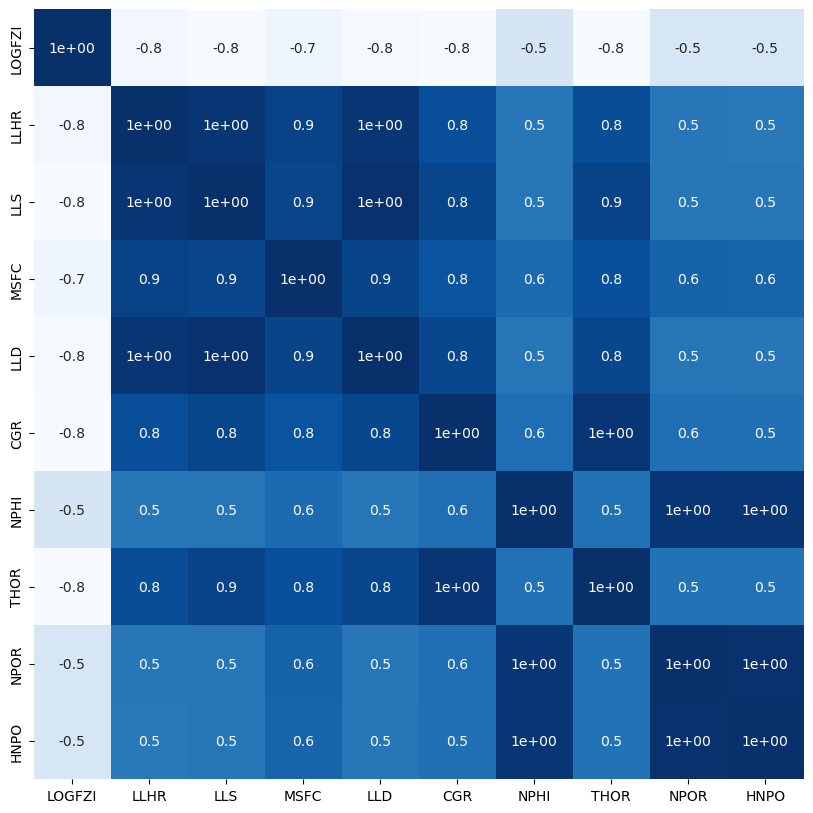

In [15]:
df2 = pd.read_csv('gamma_interp.csv')
#df = df.drop(columns = ['FZI'])
#X = data[['CGR', 'DRHO', 'DT5', 'GR', 'HNPO', 'LLD', 'LLHR', 'LLS', 'MRES', 'MSFC', 'NPHI', 'NPOR', 'RHOB', 'SP', 'THOR', 'URAN', 'POTA']]
df2 = df2[['LOGFZI', 'LLHR', 'LLS', 'MSFC', 'LLD', 'CGR', 'NPHI', 'THOR','NPOR','HNPO']]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df2.corr(), cmap= "Blues", cbar= False, annot= True, square= True, fmt= '.1')

In [16]:
X = df2.drop(columns="LOGFZI")
y = df2.LOGFZI

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 9), (53, 9), (159,), (53,))

In [17]:
X_train.columns

Index(['LLHR', 'LLS', 'MSFC', 'LLD', 'CGR', 'NPHI', 'THOR', 'NPOR', 'HNPO'], dtype='object')

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 30, 'algo__max_features': 0.3919105189047466, 'algo__min_samples_leaf': 7, 'algo__n_estimators': 161}
0.9231434692656083 0.824473168377621 0.9029071448531081


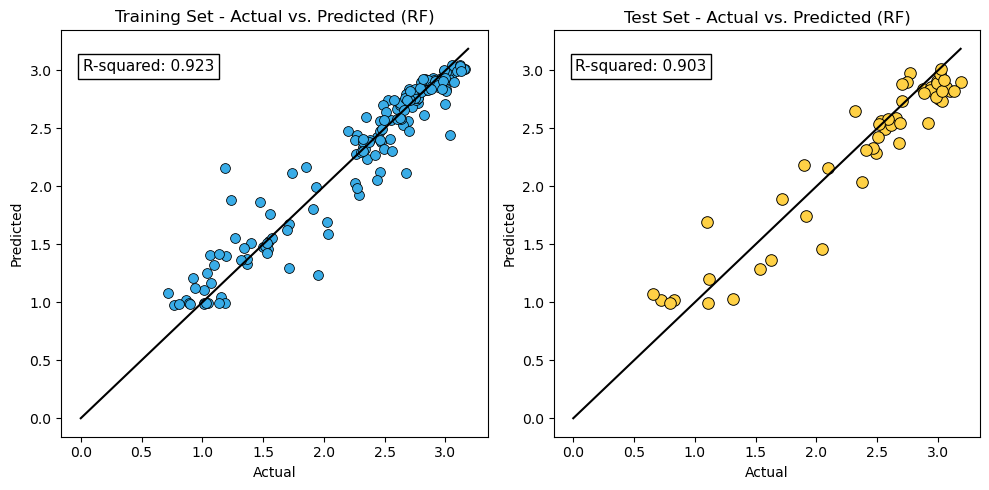

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust', transform='yeo-johnson', poly=4), X.columns)
])

from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

# Predict on training and test sets
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (RF)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (RF)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.9081060573726749 0.8066542390852294 0.8848666669132096


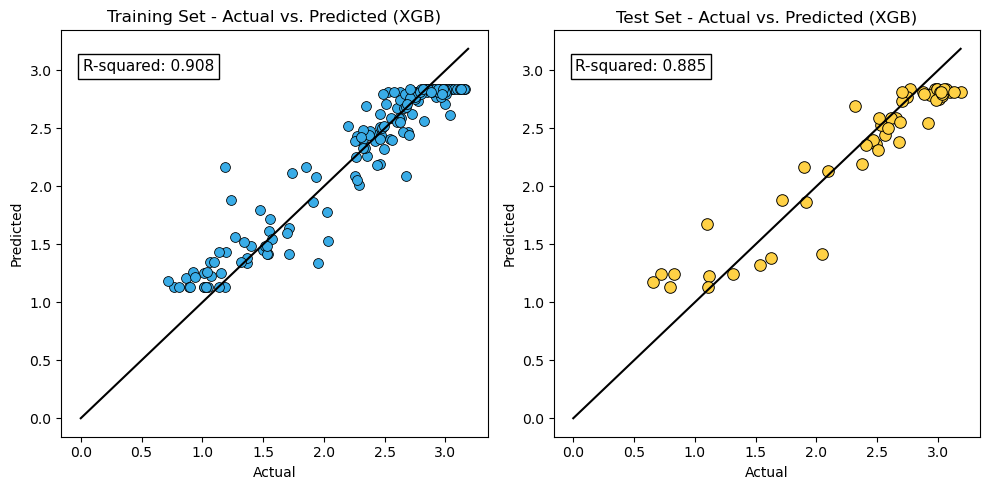

In [19]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard', transform = 'yeo-johnson', poly = 3), X.columns )])


from xgboost import XGBRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model_XGB = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_XGB.fit(X_train, y_train)

print(model_XGB.best_params_)
print(model_XGB.score(X_train, y_train), model_XGB.best_score_, model_XGB.score(X_test, y_test))

# Predict on training and test sets
y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (XGB)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (XGB)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 3.5849855803404798, 'algo__gamma': 0.0018997763474111289}
0.9148522101541008 0.8376413909173909 0.9171808003377853


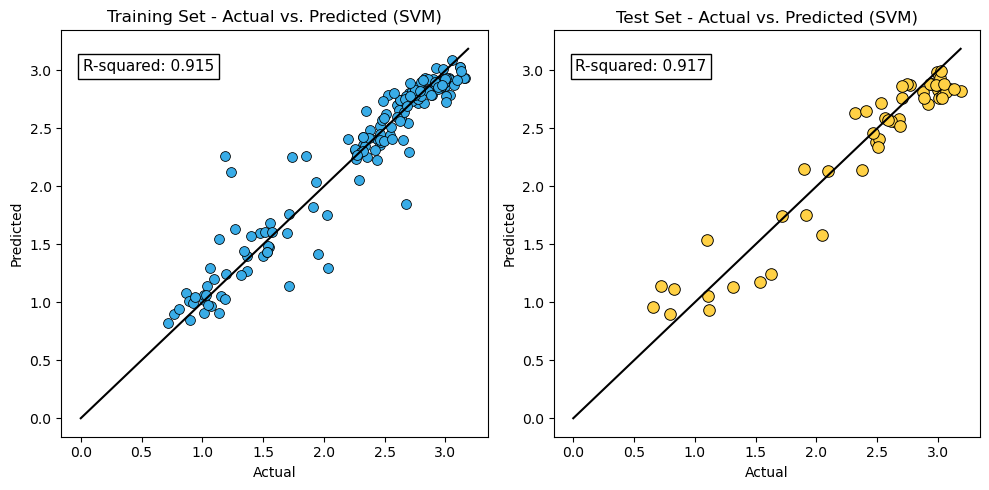

In [20]:
from sklearn.svm import SVR
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax',transform = 'yeo-johnson', poly = 4), X.columns )])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model_SVM = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.best_score_, model_SVM.score(X_test, y_test))

# Predict on training and test sets
y_train_pred = model_SVM.predict(X_train)
y_test_pred = model_SVM.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (SVM)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (SVM)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

C:\Users\haabub\anaconda3\lib\site-packages\jcopml\pipeline\_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'mlp__learning_rate_init': 0.005, 'mlp__hidden_layer_sizes': (32, 16, 2), 'mlp__alpha': 0.03, 'mlp__activation': 'identity'}
0.8445527002748706 0.8311584901066502 0.8922910057471689


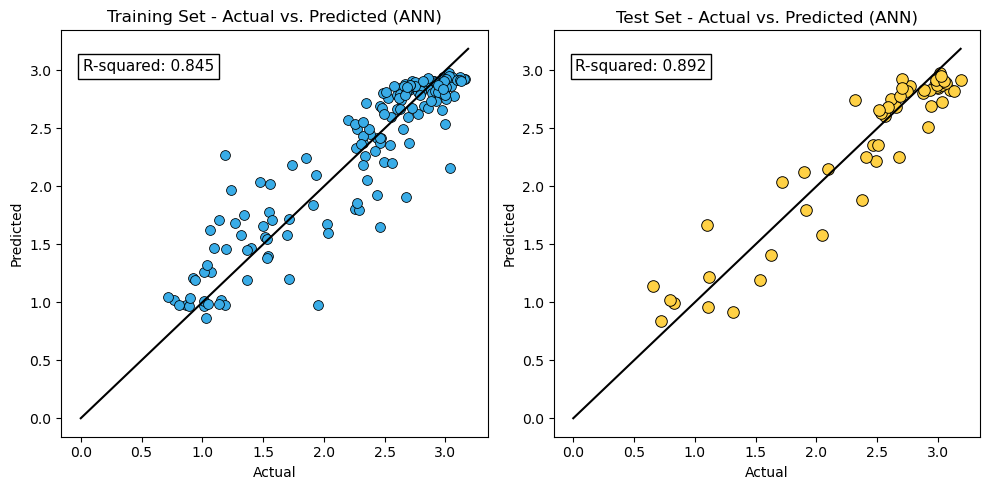

In [21]:
from sklearn.neural_network import MLPRegressor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', poly = 4, transform= 'yeo-johnson'), X.columns )])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPRegressor(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
    "mlp__hidden_layer_sizes": [(16, 8, 4), (16, 4), (8, 4), (13, 8, 2), (32, 16, 2), (64, 32, 16, 8, 4, 2)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["identity"]
}

model_ANN = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_ANN.fit(X_train, y_train)

print(model_ANN.best_params_)
print(model_ANN.score(X_train, y_train), model_ANN.best_score_, model_ANN.score(X_test, y_test))

# Predict on training and test sets
y_train_pred = model_ANN.predict(X_train)
y_test_pred = model_ANN.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create dataframes with the actual and predicted values for training and test sets
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Create separate plots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot training set
sns.scatterplot(data=train_data, x='Actual', y='Predicted', ax=axes[0],s=50, color='#39ACE7', edgecolor='black')
axes[0].set_title('Training Set - Actual vs. Predicted (ANN)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[0].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

# Add R-squared score as text inside the plot
axes[0].text(0.05, 0.9, f'R-squared: {train_r2:.3f}', transform=axes[0].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Plot test set
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axes[1],s=70, color='#ffd145', edgecolor='black')
axes[1].set_title('Test Set - Actual vs. Predicted (ANN)')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Add 1:1 line extending from (0, 0) to upper right corner
axes[1].plot([0, max(y_train.max(), y_test.max())], [0, max(y_train.max(), y_test.max())], color='black', linestyle='-')

axes[1].text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=axes[1].transAxes, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

plt.tight_layout()
plt.show()

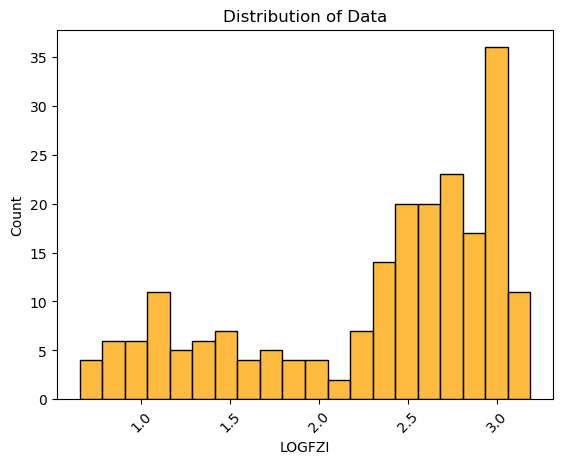

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('gamma_interp.csv')['LOGFZI']

# Plot histogram using seaborn
sns.histplot(data, color='orange', edgecolor='black', bins=20)

# Customize plot
plt.title('Distribution of Data')
plt.xlabel('LOGFZI')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust color palette
sns.set_palette('Set2')

# Show plot
plt.show()


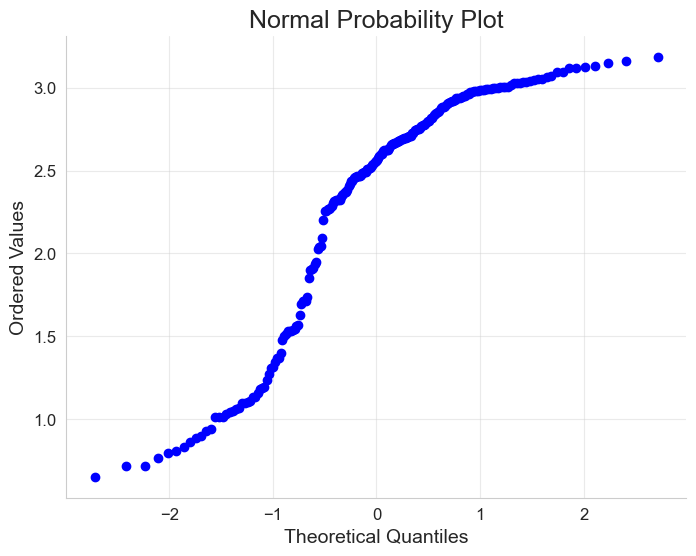

In [23]:
import numpy as np
import seaborn as sns
from scipy import stats

# Select the column to use for the normal probability plot
X = df['LOGFZI'].values

# Create normal probability plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
stats.probplot(X, plot=ax, fit=False)

# Set plot title and labels
ax.set_title('Normal Probability Plot', fontsize=18)
ax.set_xlabel('Theoretical Quantiles', fontsize=14)
ax.set_ylabel('Ordered Values', fontsize=14)

# Customize plot aesthetics
sns.despine()
ax.tick_params(labelsize=12)
ax.grid(axis='y', alpha=0.4)
ax.grid(axis='x', alpha=0.4)

# Show the plot
plt.show()


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('Data_FZI.csv')

# Extract the 'FZI' column as the feature for clustering
X = data[['LOGFZI']]

# Specify the maximum number of clusters to evaluate
max_clusters = 15

# Initialize lists to store the results
num_clusters_list = []
rmse_list = []
r2_list = []

# Perform K-Means clustering for different number of clusters
for num_clusters in range(1, max_clusters + 1):
    # Initialize K-Means clustering algorithm
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Perform clustering
    kmeans.fit(X)
    
    # Calculate the centroid for each sample
    centroids = kmeans.cluster_centers_[kmeans.labels_]
    
    # Calculate the RMSE
    rmse_value = mean_squared_error(X, centroids, squared=False)
    
    # Calculate the R-squared
    r2_value = r2_score(X, centroids)
    
    # Append number of clusters, RMSE, and R-squared to the lists
    num_clusters_list.append(num_clusters)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number of Clusters': num_clusters_list,
    'RMSE': rmse_list,
    'R-squared': r2_list
})

# Save the results to an Excel file
results_df.to_excel('elbow_method_results.xlsx', index=False)

C:\Users\haabub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\haabub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\haabub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\haabub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

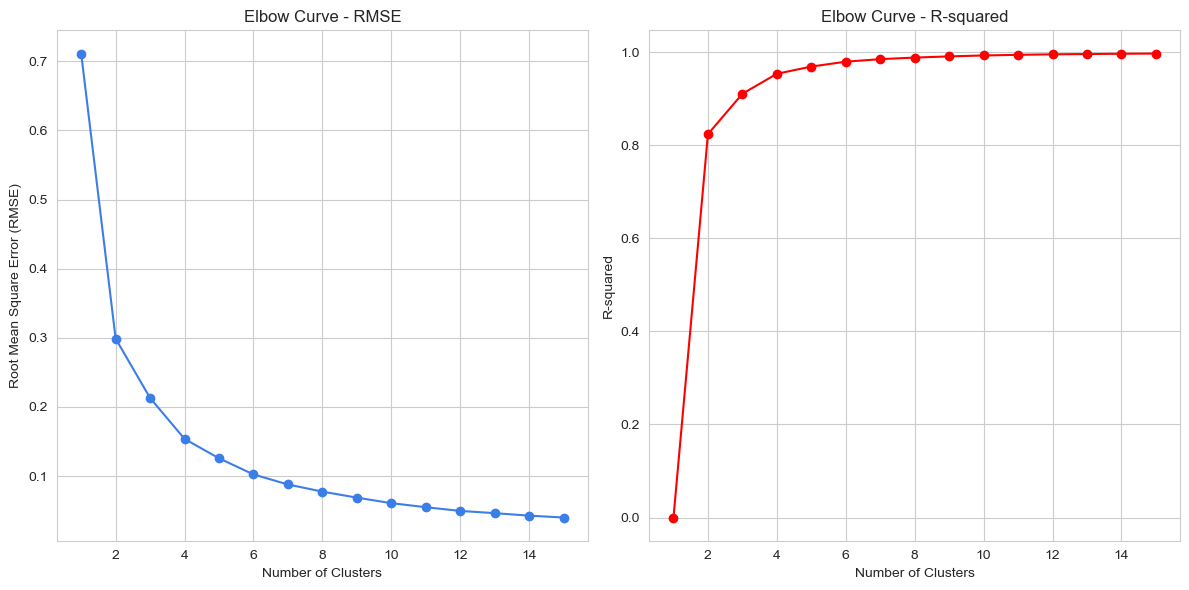

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the RMSE elbow curve
sns.set_style('whitegrid')
ax1.plot(num_clusters_list, rmse_list, marker='o', color='#3C7EE8')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Root Mean Square Error (RMSE)')
ax1.set_title('Elbow Curve - RMSE')

# Plot the R-Squared elbow curve
sns.set_style('whitegrid')
ax2.plot(num_clusters_list, r2_list, marker='o', color='#FF0000')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('R-squared')
ax2.set_title('Elbow Curve - R-squared')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [19]:
# Save the clustered data into an Excel file
#data.to_excel('Clustered_Data.xlsx', index=True)

C:\Users\haabub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\haabub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


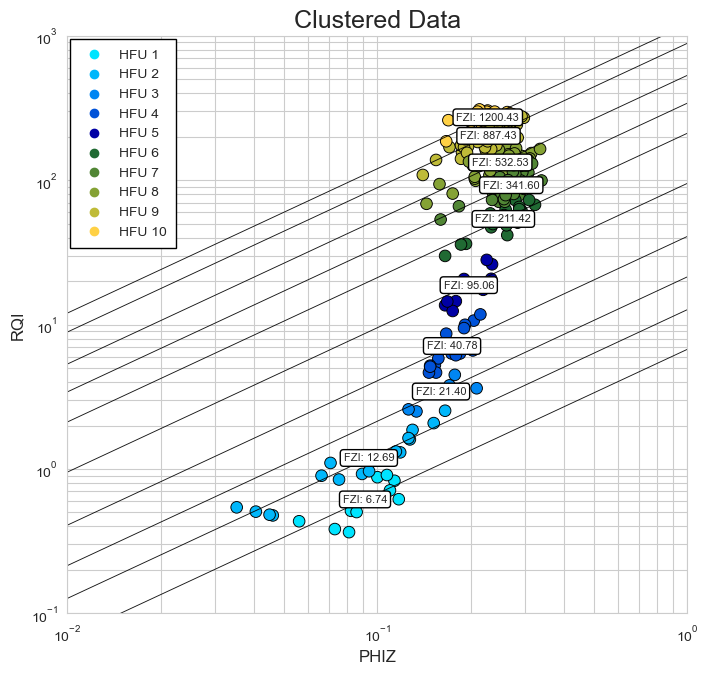

                RQI      PHIZ          FZI
Cluster                                   
HFU 1      0.615186  0.091299     6.738156
HFU 2      1.191671  0.093938    12.685708
HFU 3      3.437403  0.160611    21.402084
HFU 4      7.107769  0.174276    40.784620
HFU 5     18.757058  0.197318    95.059851
HFU 6     53.926544  0.255068   211.419878
HFU 7     92.409726  0.270521   341.599524
HFU 8    132.759414  0.249301   532.526343
HFU 9    202.758535  0.228477   887.434804
HFU 10   272.763410  0.227222  1200.429051


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('Data_FZI.csv')

# Extract the 'FZI' column as the feature for clustering
X = data[['LOGFZI']]

# Perform K-Means clustering with the optimal number of clusters
optimal_num_clusters = 10  # Change this to the desired number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Define a mapping of cluster numbers to cluster names
cluster_names = {
    0: 'HFU 9',
    1: 'HFU 3',
    2: 'HFU 6',
    3: 'HFU 1',
    4: 'HFU 5',
    5: 'HFU 7',
    6: 'HFU 2',
    7: 'HFU 10',
    8: 'HFU 4',
    9: 'HFU 8',
    # Add more mappings as needed for each cluster number
}

# Map the cluster numbers to cluster names in the DataFrame
data['Cluster'] = data['Cluster'].map(cluster_names)

# Calculate the mean 'RQI' and 'PHIZ' for each cluster
cluster_means = data.groupby('Cluster')[['RQI', 'PHIZ']].mean()

# Calculate the FZI (RQI divided by PHIZ)
cluster_means['FZI'] = cluster_means['RQI'] / cluster_means['PHIZ']

# Sort the cluster means by FZI in ascending order
cluster_means = cluster_means.sort_values('FZI')

# Get the sorted cluster labels
sorted_cluster_labels = cluster_means.index.tolist()

# Define a custom color palette for the clusters
cluster_colors = ['#00e4ff', '#00b7fb', '#0086f2', '#0052d8', '#0000a5', '#206a33', '#518635', '#85a235', '#bfbb38', '#ffd145']  # Change the colors as desired

# Plot the clustered data with the custom color palette and updated cluster labels
# Set the figure size
plt.figure(figsize=(8, 7.5))
sns.scatterplot(data=data, x='PHIZ', y='RQI', hue='Cluster', s=70, palette=cluster_colors, hue_order=sorted_cluster_labels, edgecolor='black')
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.xlabel('PHIZ', fontsize=12)
plt.ylabel('RQI', fontsize=12)
plt.title('Clustered Data', fontsize=18)

# Plot the straight lines in each centroid
for cluster in cluster_means.index:
    centroid = cluster_means.loc[cluster]
    x = np.linspace(0.001, 100, num=100) * centroid['PHIZ']  # Adjusted x-values
    y = np.linspace(0.001, 100, num=100) * centroid['RQI']  # Adjusted y-values
    plt.plot(x, y, color='black', linestyle='-', linewidth=0.65,  alpha=0.91)
       
    # Add FZI value to the cluster
    text_x = centroid['PHIZ']  # x-coordinate for the text
    text_y = centroid['RQI']  # y-coordinate for the text
    fzi_value = cluster_means.loc[cluster, 'FZI']  # FZI value for the cluster
    plt.text(text_x, text_y, f'FZI: {fzi_value:.2f}', fontsize=8, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Limit the x-axis range
plt.xlim(0.01, 1)
plt.ylim(0.1, 1000)

# Display the plot
legend = plt.legend()
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle('square')
plt.show()

# Display the mean values and FZI in the new order
print(cluster_means)

In [27]:

# Save the clustered data into an Excel file
#data.to_excel('Clustered_Data_2.xlsx', index=True)


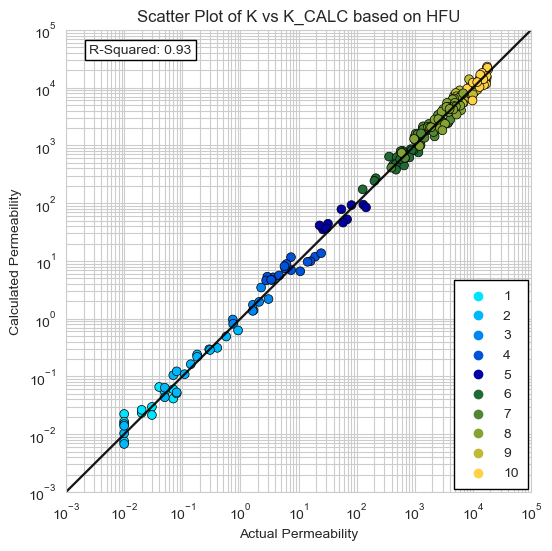

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('KPred.csv')

# Define a custom color palette for the clusters
colors = {1:'#00e4ff', 2:'#00b7fb', 3:'#0086f2', 4:'#0052d8', 5:'#0000a5', 6:'#206a33', 7:'#518635', 8:'#85a235', 9:'#bfbb38', 10:'#ffd145'}  # Change the colors as desired

# Create the scatter plot using seaborn
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='K', y='K_CALC', hue='HFU', palette=colors, s=40, edgecolor='black')

# Add labels and title to the plot
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Actual Permeability')
plt.ylabel('Calculated Permeability')
plt.title('Scatter Plot of K vs K_CALC based on HFU')

# Perform linear regression
x = df['K']
y = df['K_CALC']
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
y_fit = poly(x)

# Calculate R-squared value
residuals = y - y_fit
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Plot the fitted line
x1 = np.linspace(0.001, 100000, num=100)  # Adjusted x-values
y1 = np.linspace(0.001, 100000, num=100) # Adjusted y-values
plt.plot(x1, y1, color='black', linestyle='-', linewidth=1.65,  alpha=0.91)

# Limit the x-axis range
plt.xlim(0.001, 100000)
plt.ylim(0.001, 100000)

# Display the R-squared value in the plot
textbox_props = dict(boxstyle='square', facecolor='white', edgecolor='black')
plt.text(0.05, 0.95, f'R-Squared: {r_squared:.2f}', transform=plt.gca().transAxes, bbox=textbox_props)


# Display the plot
# Move the legend to the bottom-right corner
# Move the legend to the bottom-right corner
legend = plt.legend(loc='lower right')

# Set legend properties for background color and edge color
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle('square')
plt.grid(True, which="both", ls="-")
plt.show()


In [29]:
import pandas as pd
from scipy.stats import hmean, gmean

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('KPred.csv')

# Calculate the means and number of samples
mean_phi = df.groupby('HFU')['PHI'].mean().round(3)
mean_k_calc = df.groupby('HFU')['K_CALC'].mean().round(3)
harmonic_k_calc = df.groupby('HFU')['K_CALC'].apply(hmean).round(3)
geometric_k_calc = df.groupby('HFU')['K_CALC'].apply(gmean).round(3)
num_samples = df['HFU'].value_counts()

# Create a new DataFrame to store the means
mean_table = pd.DataFrame({
    'Mean PHI': mean_phi,
    'Mean K_CALC': mean_k_calc,
    'Harmonic K_CALC': harmonic_k_calc,
    'Geometric K_CALC': geometric_k_calc,
    'Number of Samples': num_samples
})

# Display the mean table
mean_table


,Mean PHI,Mean K_CALC,Harmonic K_CALC,Geometric K_CALC,Number of Samples
1,0.083,0.035,0.024,0.030,12
2,0.085,0.176,0.036,0.092,18
3,0.138,1.737,1.444,1.580,8
4,0.148,7.797,6.911,7.331,16
5,0.164,60.609,52.854,56.493,10
6,0.202,624.634,502.052,568.510,21
7,0.212,1890.420,1582.707,1765.872,31
8,0.198,3794.595,2806.699,3334.136,35
9,0.185,8184.655,6410.074,7314.078,40
10,0.185,14299.726,12511.899,13446.555,21


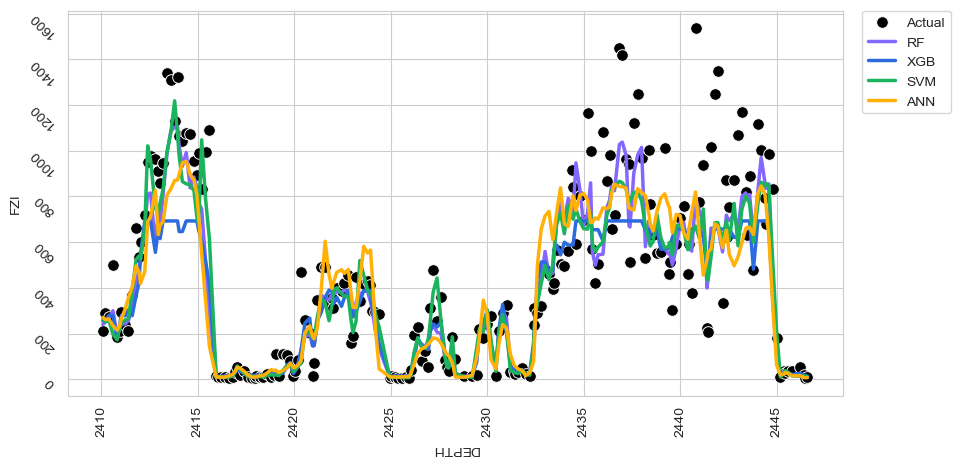

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with the actual feature values for the unsampled location
unsampled_features = pd.read_csv('datatest1.csv')
df3 = pd.read_csv('datatest0.csv')

# Prepare the input data for prediction
unsampled_data = unsampled_features[['LLHR', 'LLS', 'MSFC', 'LLD', 'CGR', 'NPHI', 'THOR', 'NPOR', 'HNPO']]
unsampled_data['DEPTH'] = unsampled_features['DEPTH']  # Add DEPTH column to unsampled_data

# Use the trained models to make predictions
unsampled_predictions_RF = model_RF.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_XGB = model_XGB.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_SVM = model_SVM.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_ANN = model_ANN.predict(unsampled_data.drop('DEPTH', axis=1))

# Apply back transformation to FZI values for each model's predictions
unsampled_predictions_RF = 10 ** (unsampled_predictions_RF)
unsampled_predictions_XGB = 10 ** (unsampled_predictions_XGB)
unsampled_predictions_SVM = 10 ** (unsampled_predictions_SVM)
unsampled_predictions_ANN = 10 ** (unsampled_predictions_ANN)

# Create separate columns for each model's predictions in the unsampled_data DataFrame
unsampled_data['Predicted_RF'] = unsampled_predictions_RF
unsampled_data['Predicted_XGB'] = unsampled_predictions_XGB
unsampled_data['Predicted_SVM'] = unsampled_predictions_SVM
unsampled_data['Predicted_ANN'] = unsampled_predictions_ANN

# Define the colors for scatter plots and lines
colorsz = ['#8367FF', '#2C6BDF', '#1BB35D', '#FFB107']

# Plot the actual and predicted values using seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df3, x='DEPTH', y='FZI', color='black', label='Actual', marker='o', s=70)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_RF', color=colorsz[0], label='RF', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_XGB', color=colorsz[1], label='XGB', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_SVM', color=colorsz[2], label='SVM', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_ANN', color=colorsz[3], label='ANN', linewidth=2.5)

plt.xlabel('DEPTH', rotation=180)
legend = plt.legend(loc='upper left', bbox_to_anchor=(1.025, 1), ncol=1, borderaxespad=0)
plt.setp(legend.get_title(), rotation=-90) 

# Rotate x-axis label
plt.xticks(rotation=90)  # Rotates x-axis labels by 90 degrees clockwise
plt.yticks(rotation=135)

plt.show()


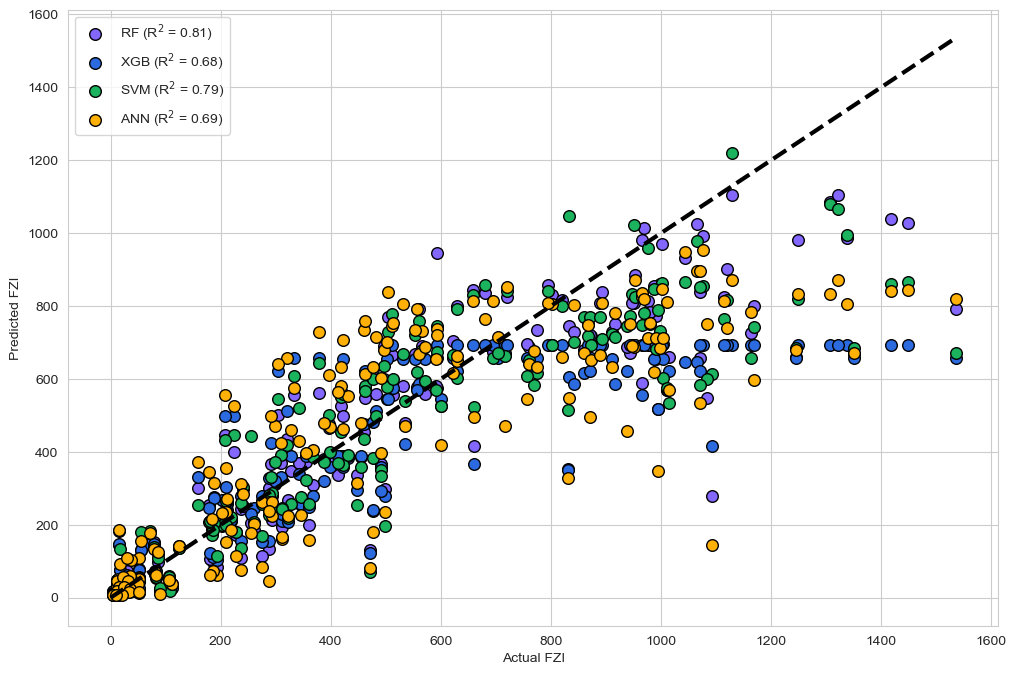

RMSE:
RF: 176.09
XGB: 227.62
SVM: 182.84
ANN: 221.60


In [87]:
# Find the maximum actual and predicted values
max_value = max(df3['FZI'].max(), unsampled_data['Predicted_RF'].max(),
                unsampled_data['Predicted_XGB'].max(), unsampled_data['Predicted_SVM'].max(),
                unsampled_data['Predicted_ANN'].max())

# Plot the 1:1 line and R-squared values for all models
plt.figure(figsize=(12, 8))
plt.plot([0, max_value], [0, max_value], color='black', linestyle='--', linewidth = 3)

# Define the colors for scatter plots and lines
colorsz = ['#8367FF', '#2C6BDF', '#1BB35D', '#FFB107']

# Scatter plots and corresponding straight lines with contrasting colors
plt.scatter(df3['FZI'], unsampled_data['Predicted_RF'], color=colorsz[0], label=f'RF (R$^2$ = {r2_RF:.2f})', s = 70, edgecolor='black')
plt.scatter(df3['FZI'], unsampled_data['Predicted_XGB'], color=colorsz[1],label=f'XGB (R$^2$ = {r2_XGB:.2f})', s = 70, edgecolor='black')
plt.scatter(df3['FZI'], unsampled_data['Predicted_SVM'], color=colorsz[2],label=f'SVM (R$^2$ = {r2_SVM:.2f})', s = 70, edgecolor='black')
plt.scatter(df3['FZI'], unsampled_data['Predicted_ANN'], color=colorsz[3],label=f'ANN (R$^2$ = {r2_ANN:.2f})', s = 70, edgecolor='black')

plt.xlabel('Actual FZI')
plt.ylabel('Predicted FZI')
plt.legend()
plt.show()

# Print the RMSE for each model
print('RMSE:')
print(f'RF: {rmse_RF:.2f}')
print(f'XGB: {rmse_XGB:.2f}')
print(f'SVM: {rmse_SVM:.2f}')
print(f'ANN: {rmse_ANN:.2f}')


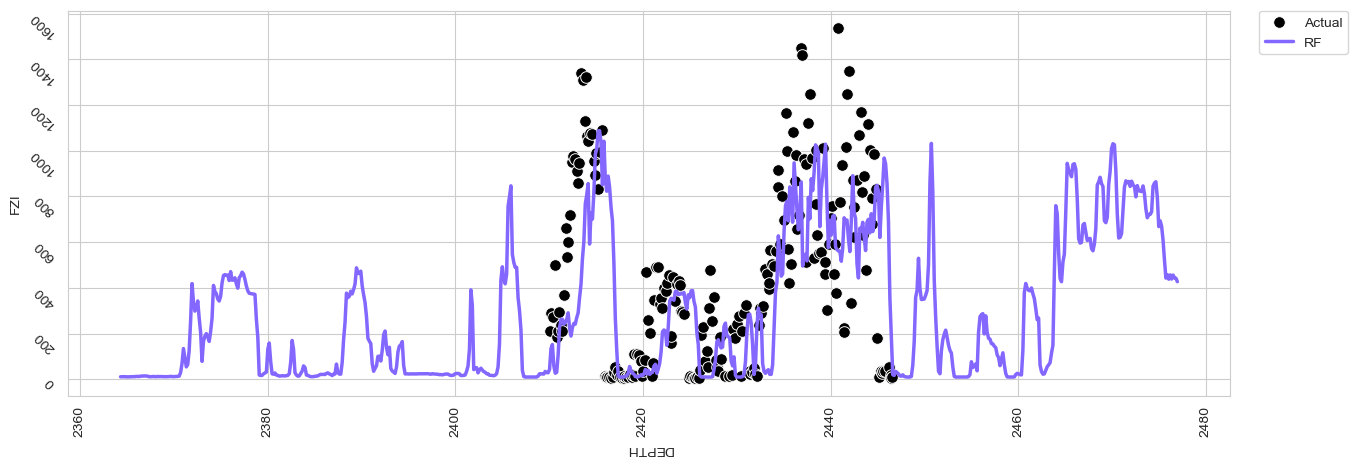

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with the actual feature values for the unsampled location
unsampled_features = pd.read_csv('datatest2.csv')
df3 = pd.read_csv('datatest0.csv')

# Prepare the input data for prediction
unsampled_data = unsampled_features[['LLHR', 'LLS', 'MSFC', 'LLD', 'CGR', 'NPHI', 'THOR', 'NPOR', 'HNPO']]
unsampled_data['DEPTH'] = unsampled_features['DEPTH']  # Add DEPTH column to unsampled_data

# Use the trained models to make predictions
unsampled_predictions_RF = model_RF.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_XGB = model_XGB.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_SVM = model_SVM.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_ANN = model_ANN.predict(unsampled_data.drop('DEPTH', axis=1))

# Apply back transformation to FZI values for each model's predictions
unsampled_predictions_RF = 10 ** (unsampled_predictions_RF)
unsampled_predictions_XGB = 10 ** (unsampled_predictions_XGB)
unsampled_predictions_SVM = 10 ** (unsampled_predictions_SVM)
unsampled_predictions_ANN = 10 ** (unsampled_predictions_ANN)

# Create separate columns for each model's predictions in the unsampled_data DataFrame
unsampled_data['Predicted_RF'] = unsampled_predictions_RF
unsampled_data['Predicted_XGB'] = unsampled_predictions_XGB
unsampled_data['Predicted_SVM'] = unsampled_predictions_SVM
unsampled_data['Predicted_ANN'] = unsampled_predictions_ANN

# Define the colors for scatter plots and lines
colorsz = ['#8367FF', '#2C6BDF', '#1BB35D', '#FFB107']

# Plot the actual and predicted values using seaborn
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df3, x='DEPTH', y='FZI', color='black', label='Actual', marker='o', s=70)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_RF', color=colorsz[0], label='RF', linewidth=2.5)
#sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_XGB', color=colorsz[1], label='XGB', linewidth=2.5)
#sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_SVM', color=colorsz[2], label='SVM', linewidth=2.5)
#sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_ANN', color=colorsz[3], label='ANN', linewidth=2.5)

plt.xlabel('DEPTH', rotation=180)
legend = plt.legend(loc='upper left', bbox_to_anchor=(1.025, 1), ncol=1, borderaxespad=0)
plt.setp(legend.get_title(), rotation=-90) 

# Rotate x-axis label
plt.xticks(rotation=90)  # Rotates x-axis labels by 90 degrees clockwise
plt.yticks(rotation=135)

plt.show()


In [145]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the RMSE
rmse = sqrt(mean_squared_error(df3['FZI'], unsampled_data['Predicted']))

# Create a DataFrame to store the error values
error_data = pd.DataFrame({'Actual FZI': df3['FZI'], 'Predicted FZI': unsampled_data['Predicted']})
error_data['Error'] = error_data['Actual FZI'] - error_data['Predicted FZI']

# Save the error data to an Excel file
error_data.to_excel('error_analysis.xlsx', index=False)


In [57]:
import pandas as pd

# Read the datasets
merge1 = pd.read_csv('merge1.csv')
merge2 = pd.read_csv('merge2.csv')

merge1['FZI'] = np.interp(merge1['DEPTH'], merge2['DEPTH'], merge2['FZI'])

merge1

# Save the updated merge1 dataset
merge1.to_csv('updated_merge1.csv', index=False)


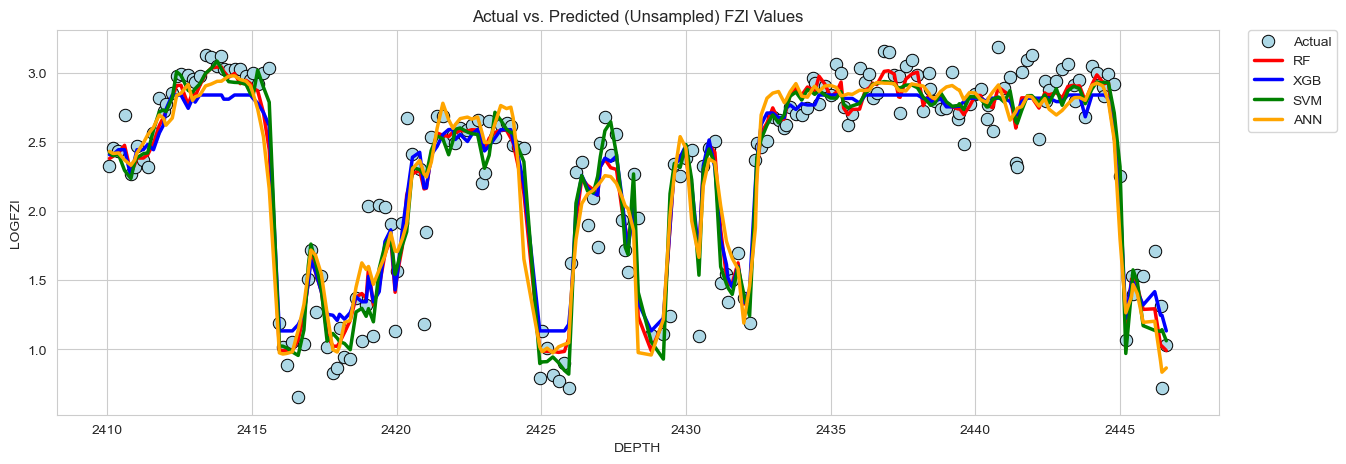

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with the actual feature values for the unsampled location
unsampled_features = pd.read_csv('datatest1.csv')
df3 = pd.read_csv('datatest0.csv')

# Prepare the input data for prediction
unsampled_data = unsampled_features[['LLHR', 'LLS', 'MSFC', 'LLD', 'CGR', 'NPHI', 'THOR', 'NPOR', 'HNPO']]
unsampled_data['DEPTH'] = unsampled_features['DEPTH']  # Add DEPTH column to unsampled_data

# Use the trained models to make predictions
unsampled_predictions_RF = model_RF.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_XGB = model_XGB.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_SVM = model_SVM.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_ANN = model_ANN.predict(unsampled_data.drop('DEPTH', axis=1))

# Apply back transformation to FZI values for each model's predictions
unsampled_predictions_RF = (unsampled_predictions_RF)
unsampled_predictions_XGB = (unsampled_predictions_XGB)
unsampled_predictions_SVM = (unsampled_predictions_SVM)
unsampled_predictions_ANN = (unsampled_predictions_ANN)

# Create separate columns for each model's predictions in the unsampled_data DataFrame
unsampled_data['Predicted_RF'] = unsampled_predictions_RF
unsampled_data['Predicted_XGB'] = unsampled_predictions_XGB
unsampled_data['Predicted_SVM'] = unsampled_predictions_SVM
unsampled_data['Predicted_ANN'] = unsampled_predictions_ANN

# Plot the actual and predicted values using seaborn
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df3, x='DEPTH', y='LOGFZI', color='#add8e6', label='Actual', marker='o', s=80, edgecolor='black')
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_RF', color='red', label='RF', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_XGB', color='blue', label='XGB', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_SVM', color='green', label='SVM', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_ANN', color='orange', label='ANN', linewidth=2.5)

plt.xlabel('DEPTH')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1.025, 1), ncol=1, borderaxespad=0)
plt.setp(legend.get_title(), rotation=-90)  # Rotate the legend title
plt.title('Actual vs. Predicted (Unsampled) FZI Values')
plt.show()



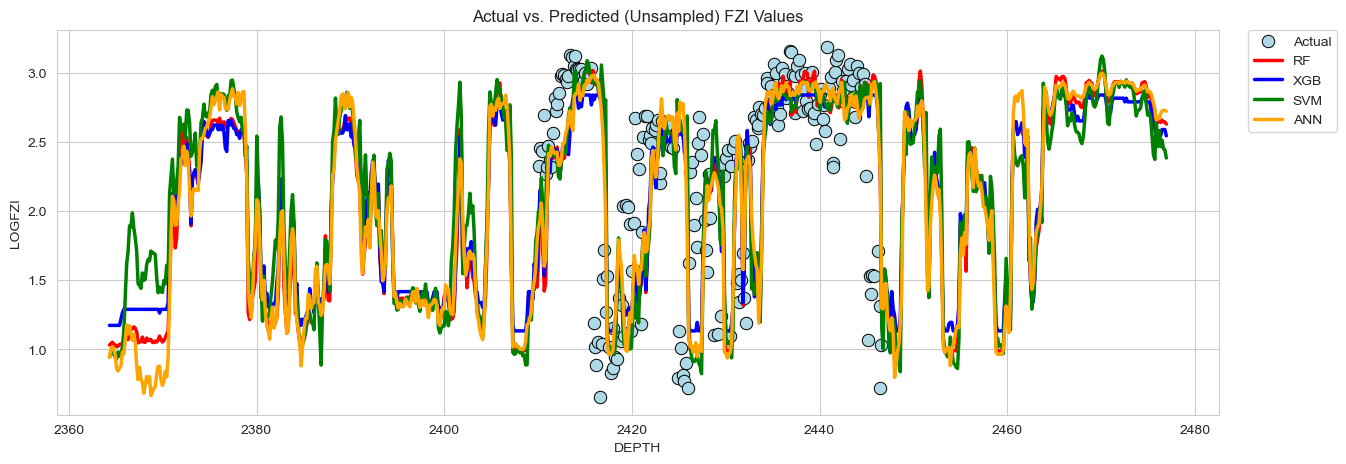

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with the actual feature values for the unsampled location
unsampled_features = pd.read_csv('datatest2.csv')
df3 = pd.read_csv('datatest0.csv')

# Prepare the input data for prediction
unsampled_data = unsampled_features[['LLHR', 'LLS', 'MSFC', 'LLD', 'CGR', 'NPHI', 'THOR', 'NPOR', 'HNPO']]
unsampled_data['DEPTH'] = unsampled_features['DEPTH']  # Add DEPTH column to unsampled_data

# Use the trained models to make predictions
unsampled_predictions_RF = model_RF.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_XGB = model_XGB.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_SVM = model_SVM.predict(unsampled_data.drop('DEPTH', axis=1))
unsampled_predictions_ANN = model_ANN.predict(unsampled_data.drop('DEPTH', axis=1))

# Apply back transformation to FZI values for each model's predictions
unsampled_predictions_RF = (unsampled_predictions_RF)
unsampled_predictions_XGB = (unsampled_predictions_XGB)
unsampled_predictions_SVM = (unsampled_predictions_SVM)
unsampled_predictions_ANN = (unsampled_predictions_ANN)

# Create separate columns for each model's predictions in the unsampled_data DataFrame
unsampled_data['Predicted_RF'] = unsampled_predictions_RF
unsampled_data['Predicted_XGB'] = unsampled_predictions_XGB
unsampled_data['Predicted_SVM'] = unsampled_predictions_SVM
unsampled_data['Predicted_ANN'] = unsampled_predictions_ANN

# Plot the actual and predicted values using seaborn
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df3, x='DEPTH', y='LOGFZI', color='#add8e6', label='Actual', marker='o', s=80, edgecolor='black')
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_RF', color='red', label='RF', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_XGB', color='blue', label='XGB', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_SVM', color='green', label='SVM', linewidth=2.5)
sns.lineplot(data=unsampled_data, x='DEPTH', y='Predicted_ANN', color='orange', label='ANN', linewidth=2.5)

plt.xlabel('DEPTH')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1.025, 1), ncol=1, borderaxespad=0)
plt.setp(legend.get_title(), rotation=-90)  # Rotate the legend title
plt.title('Actual vs. Predicted (Unsampled) FZI Values')
plt.show()

